<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos_machine_learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Visualizando o dataset

In [2]:
#crregar o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

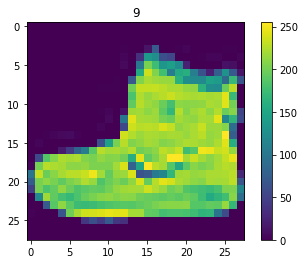

In [3]:
#explorar os dados
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
identificacoes_treino.min()
identificacoes_treino.max()

#exibir os dados
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [17]:

imagens_treino = imagens_treino/float(255)


# Criando, compilando, treinando e normalizando o modelo

In [18]:

modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),  
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1027
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1020 - val_loss: 2.3029 - val_accuracy: 0.0957


# Salvando o modelo carregado

In [15]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

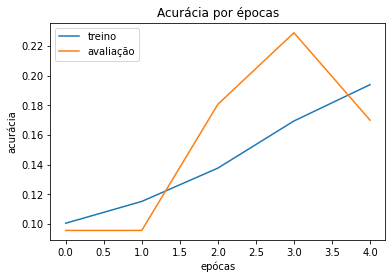

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epócas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

# Visualizando as perdas de treino e validação por época

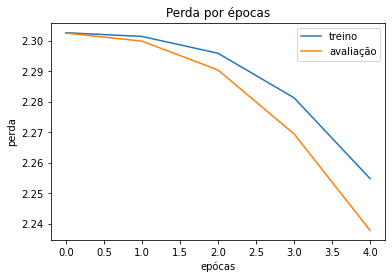

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('epócas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])

# Testando o modelo e o modelo salvo

In [16]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste: ', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ',np.argmax(testes_modelo_salvo[0]))
print('número da imagem de teste modelo salvo: ', identificacoes_teste[0])

resultado teste: 7
número da imagem de teste:  9
resultado teste modelo salvo:  7
número da imagem de teste modelo salvo:  9


# Avaliando o modelo

In [9]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste', acuracia_teste)


313/313 [==============================] - 1s 2ms/step - loss: 53.6047 - accuracy: 0.8780
Perda do teste:  53.604713439941406
Acurácia do teste 0.878000020980835
